<a href="https://colab.research.google.com/github/AyumiOsawa/UCREL_NLP_summerschool_2024/blob/main/Session_3_Semantic_Analysis_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tasks: Semantic Analysis

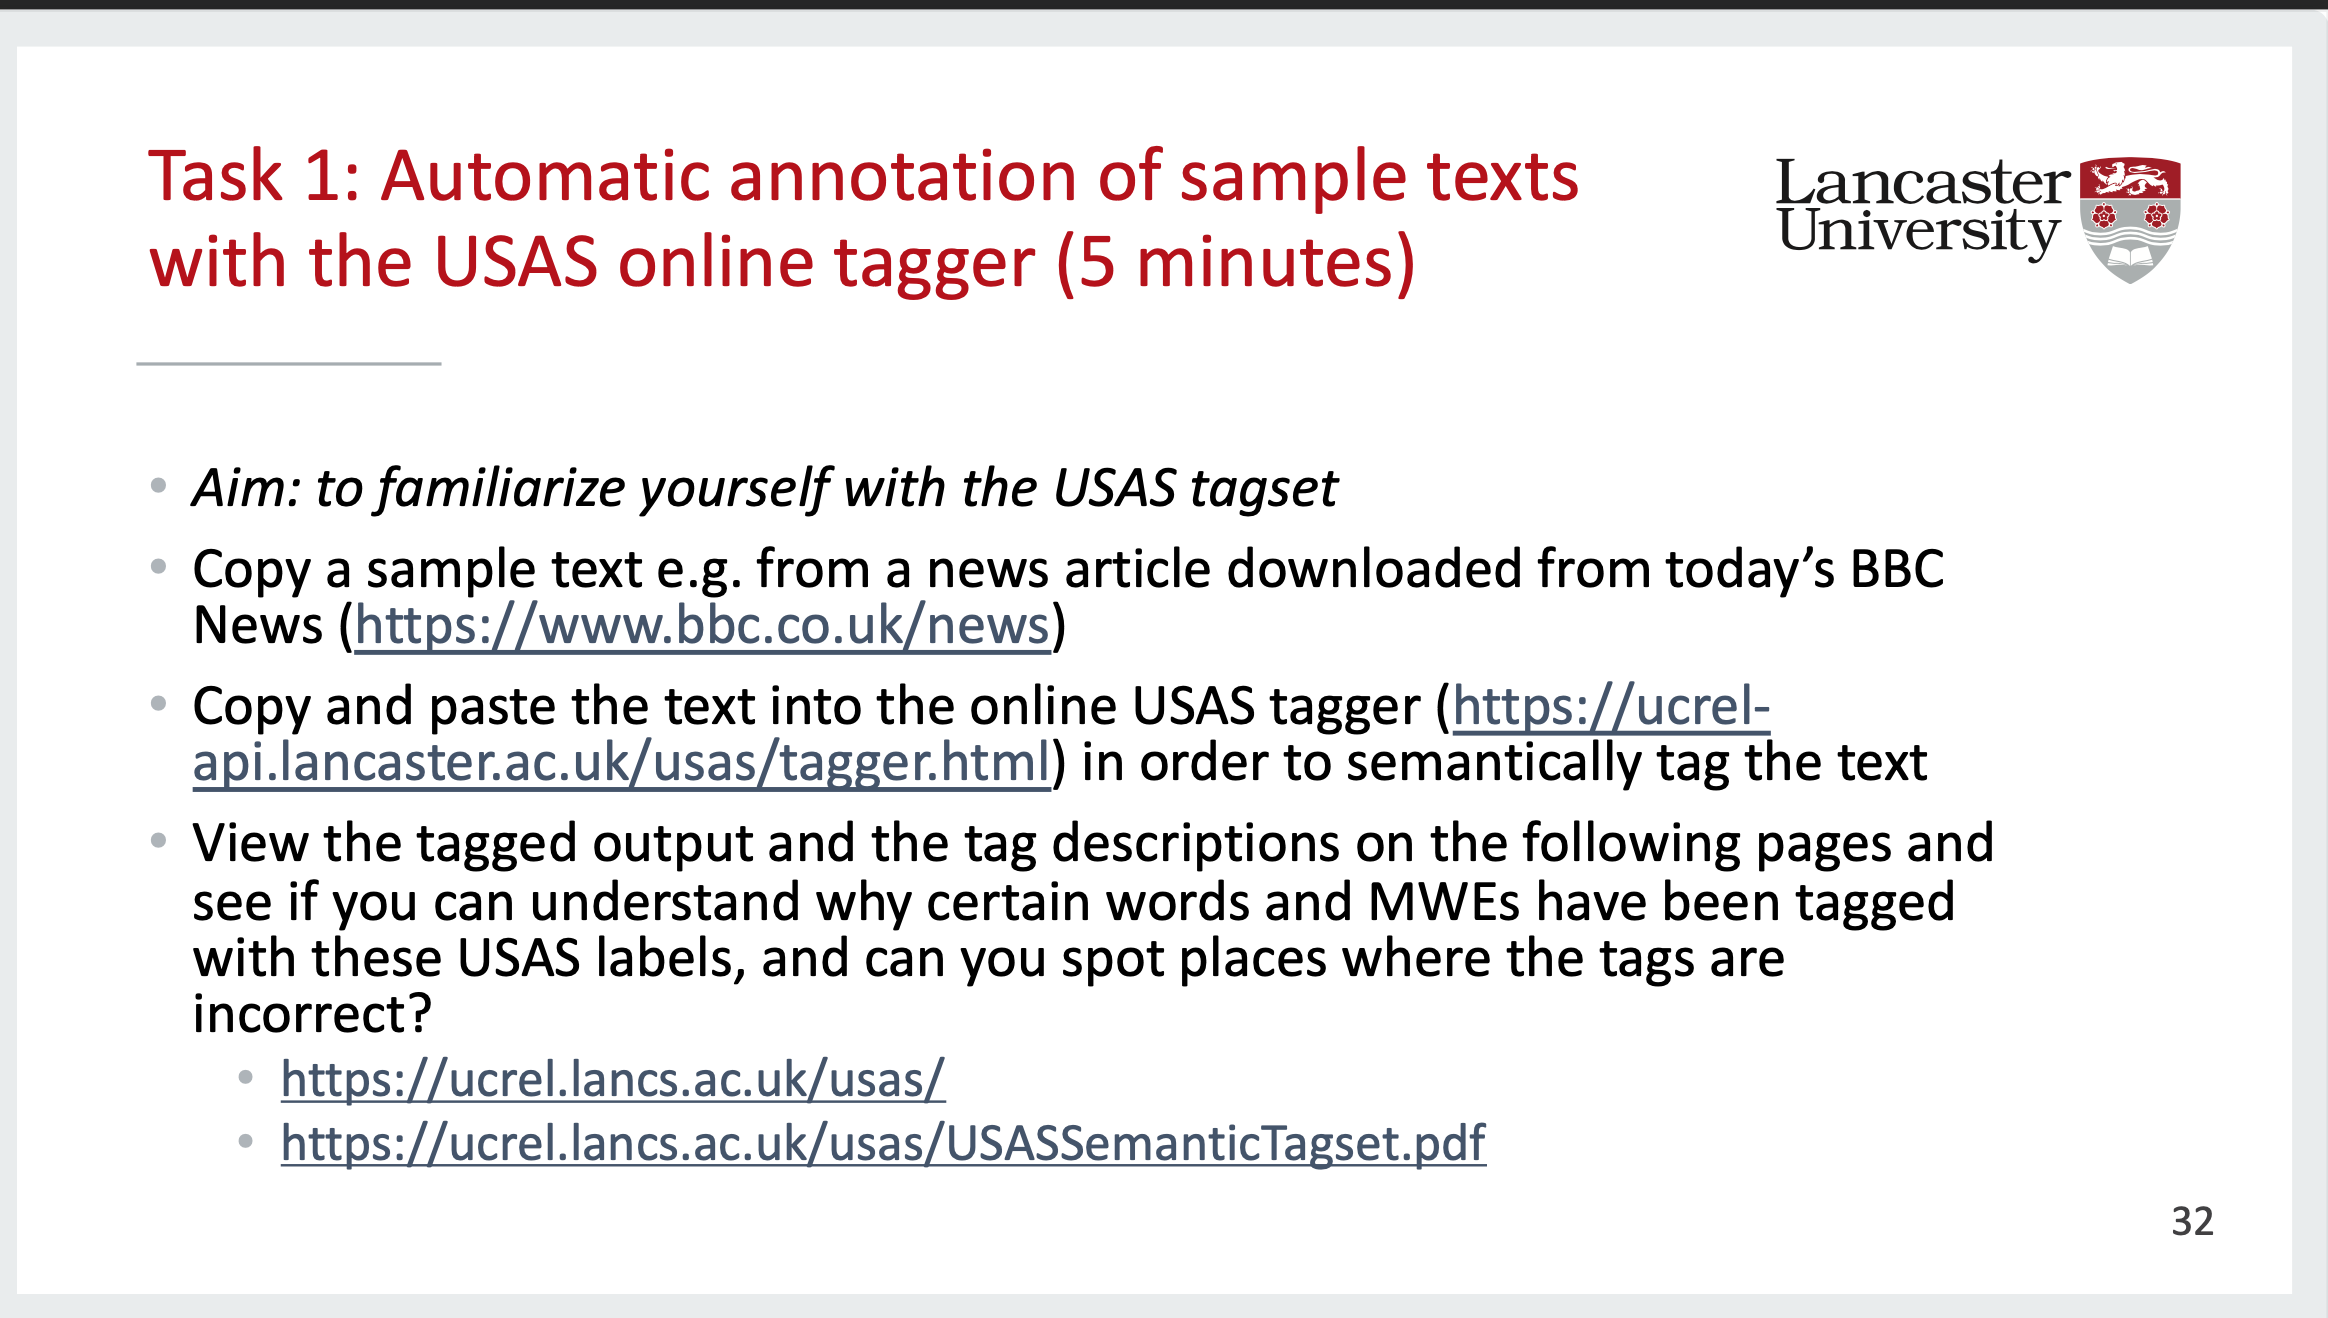

In [ ]:
txt = "Two incredibly rare fossils found on Scotland's Isle of Skye are rewriting our understanding of how mammals evolved."

# Online tagger: https://ucrel-api.lancaster.ac.uk/cgi-bin/usas.pl

tagged = """
Two_N1 incredibly_A13.3 rare_N6- fossils_W3 found_A10+ on_Z5 Scotland_Z2 's_Z5
Isle_Z2[i1.3.1 of_Z2[i1.3.2 Skye_Z2[i1.3.3 are_Z5 rewriting_Q1.2/N6+ our_Z8
understanding_X2.5+ of_Z5 how_Z5 mammals_L2mfn evolved_A2.1+ ._PUNC
"""

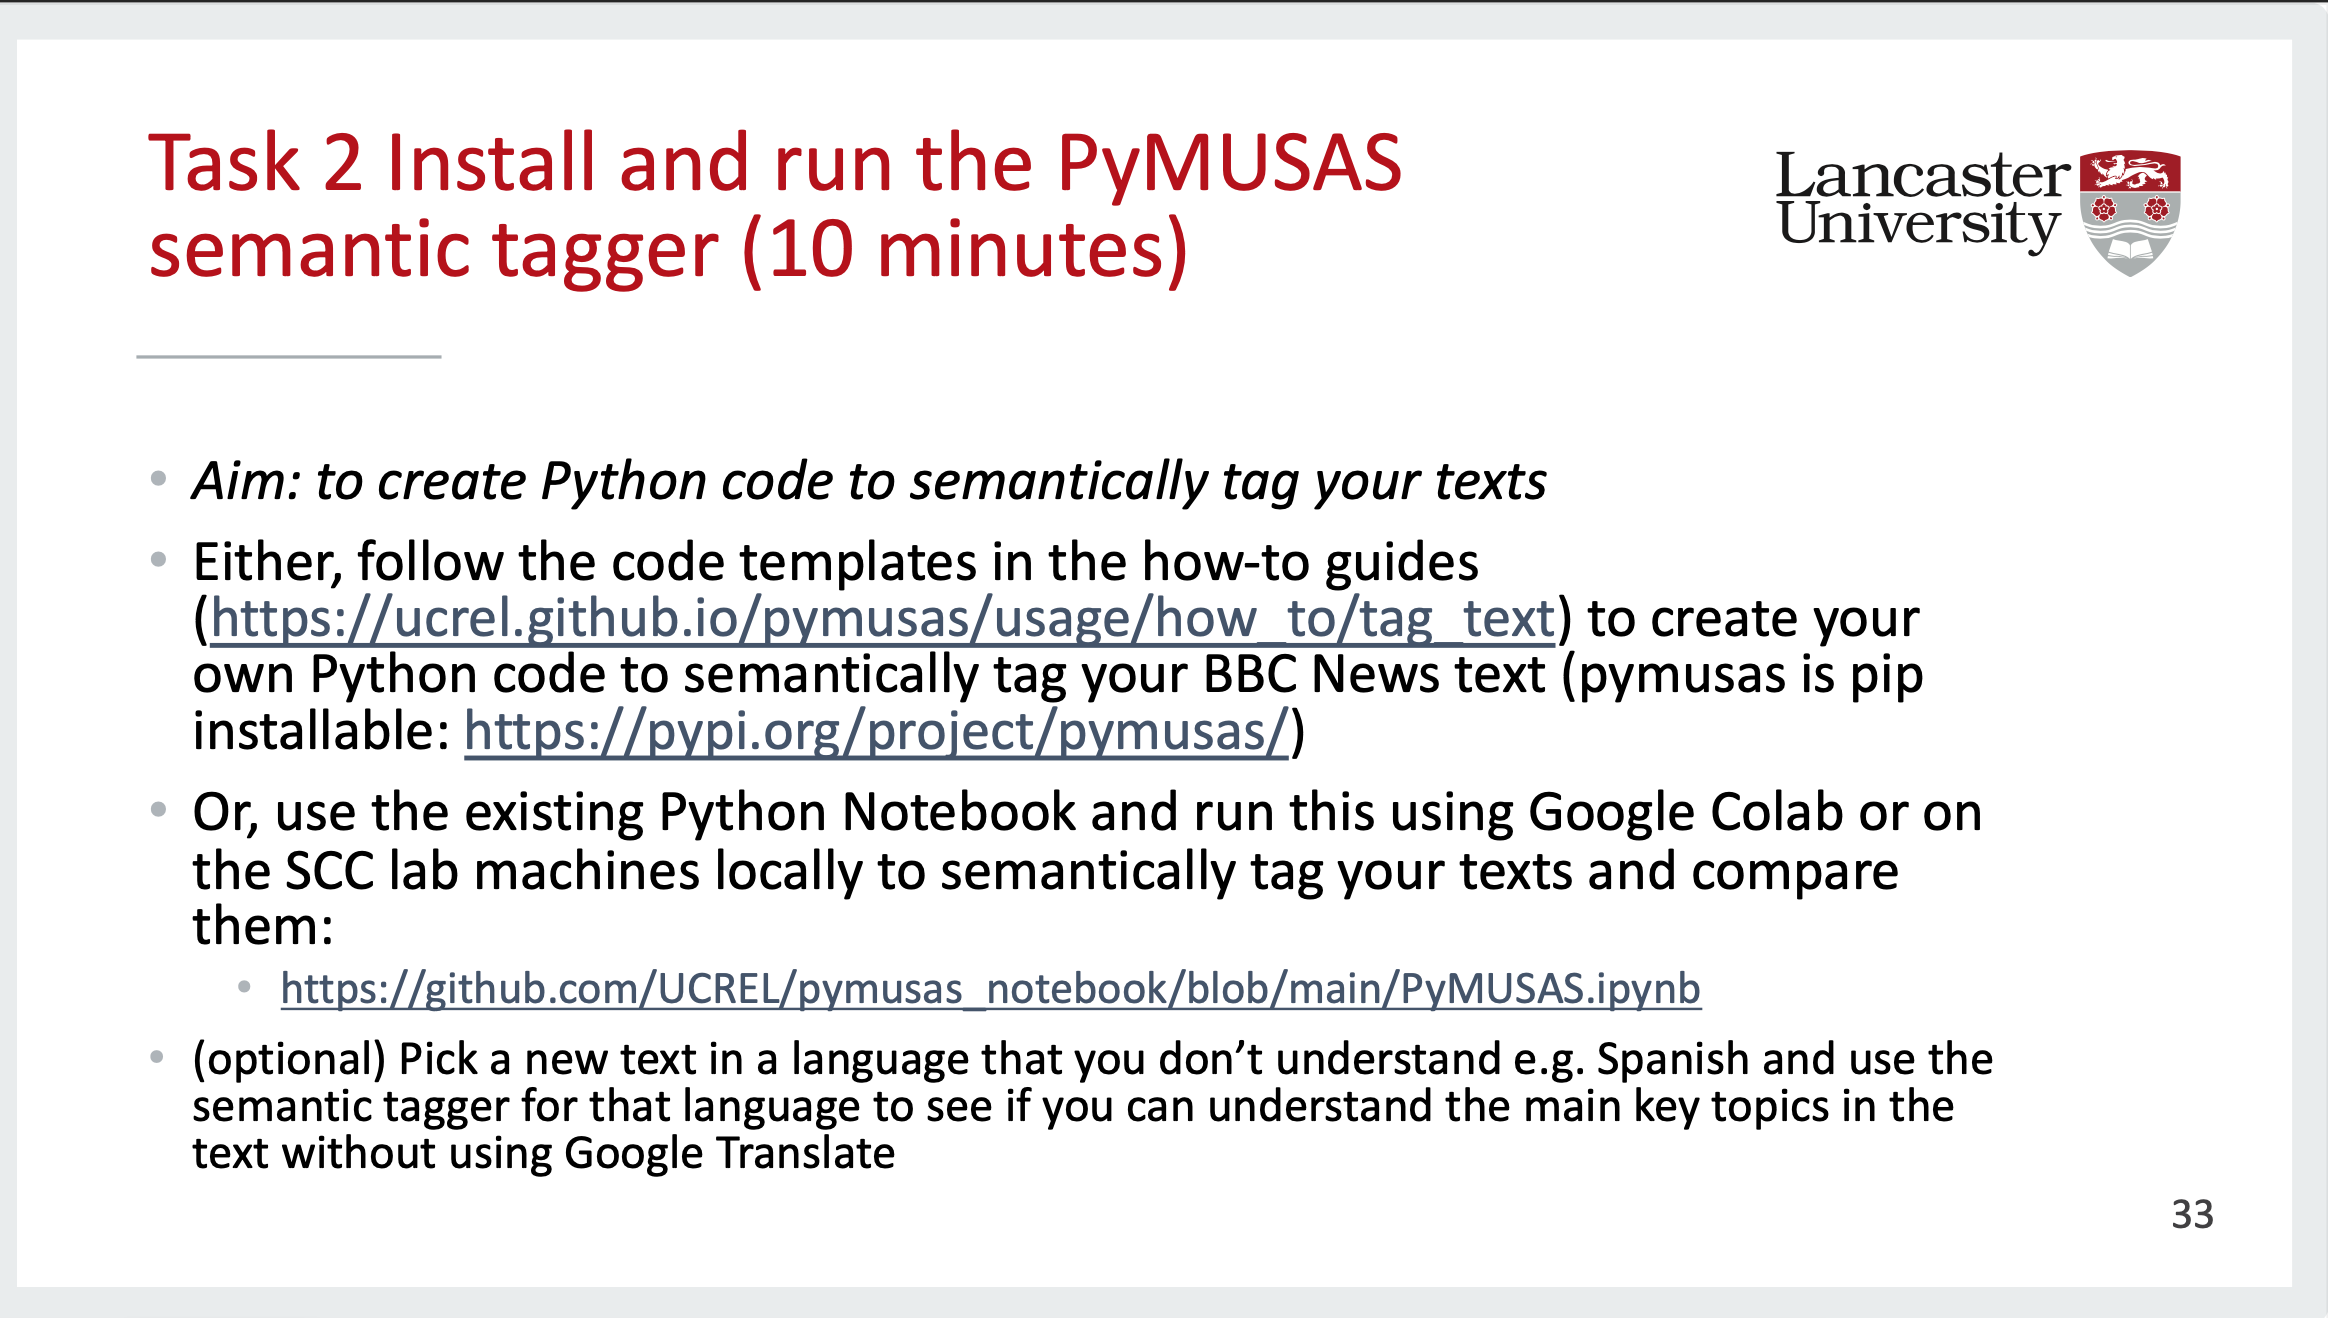

In [1]:
%%bash

pip install pymusas spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 974.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7


In [4]:
%%bash

pip install https://github.com/UCREL/pymusas-models/releases/download/en_dual_none_contextual-0.3.3/en_dual_none_contextual-0.3.3-py3-none-any.whl

  Using cached https://github.com/UCREL/pymusas-models/releases/download/en_dual_none_contextual-0.3.3/en_dual_none_contextual-0.3.3-py3-none-any.whl (902 kB)


In [5]:
import spacy

## Setup a tagger

In [6]:
# Exclude unnecessary parts of spacy.
nlp = spacy.load('en_core_web_sm', exclude=['parser', 'ner'])

# Load the English PyMUSAS rule based tagger in a separate spaCy pipeline.
english_tagger_pipeline = spacy.load('en_dual_none_contextual')

# Add the English PyMUSAS rule based tagger to the main spaCy pipeline.
nlp.add_pipe('pymusas_rule_based_tagger', source=english_tagger_pipeline)

## Tag the Text

In [8]:
txt = """
Two incredibly rare fossils found on Scotland's Isle of Skye are rewriting our understanding of how mammals evolved.

While modern small mammals live as little as a year, one of the first to roam the earth, alongside dinosaurs, could reach seven years and beyond, scientists have discovered.

Only a handful of fossils of the primitive shrew-like mammal, Krusatodon, have ever been found, including two exceptionally complete skeletons of a juvenile and an adult from Skye.

By studying fossils of the earliest mammals, scientists hope to unlock the secrets of how they rose to become super successful animals occupying every habitat on the planet.
"""
output_doc = nlp(txt)

print(f'Text\tLemma\tPOS\tUSAS Tags')
for token in output_doc:
    print(f'{token.text}\t{token.lemma_}\t{token.pos_}\t{token._.pymusas_tags}')

Text	Lemma	POS	USAS Tags

	
	SPACE	['Z99']
Two	two	NUM	['N1', 'T3', 'T1.2']
incredibly	incredibly	ADV	['A13.3', 'A6.2-']
rare	rare	ADJ	['N6-', 'A6.2-', 'A5.1+', 'F1']
fossils	fossil	NOUN	['W3', 'T3+']
found	find	VERB	['A10+', 'X2.1', 'X6+', 'T2+', 'A2.2', 'A1.1.1']
on	on	ADP	['Z5']
Scotland	Scotland	PROPN	['Z2']
's	's	PART	['Z5']
Isle	Isle	PROPN	['W3']
of	of	ADP	['Z5']
Skye	Skye	PROPN	['Z2']
are	be	AUX	['A3+', 'Z5']
rewriting	rewrite	VERB	['A5.4+']
our	our	PRON	['A5.4+']
understanding	understanding	NOUN	['X2.5+']
of	of	ADP	['Z5']
how	how	SCONJ	['Z5', 'A13.3']
mammals	mammal	NOUN	['L2mfn']
evolved	evolve	VERB	['A2.1+']
.	.	PUNCT	['PUNCT']


	

	SPACE	['Z99']
While	while	SCONJ	['Z5']
modern	modern	ADJ	['T3-']
small	small	ADJ	['N3.2-', 'N3.7-', 'N5-', 'T3-', 'A11.1-', 'S5-/I2.1', 'X3.2-', 'A5.1-']
mammals	mammal	NOUN	['L2mfn']
live	live	VERB	['H4', 'L1+', 'A3']
as	as	ADV	['A13']
little	little	ADJ	['N3.2-', 'T3-', 'N3.7-', 'N3.3-', 'T1.3-', 'A11.1-']
as	as	ADP	['Z5']
a	a	DET	['Z5']
year	ye